## MAI ML Contest 1


In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
df = pd.read_csv("train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


## Final model submit function

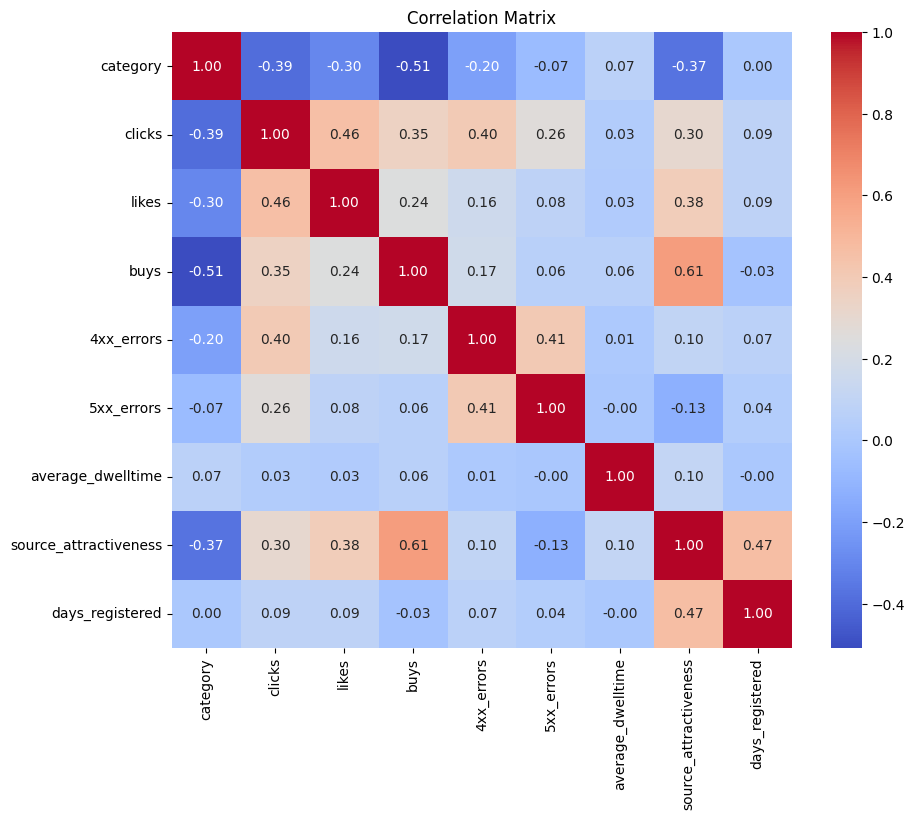

,category,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness,days_registered
0,0,2.749785e+06,598502.743179,0.0,82221,0,18.450527,0.461750,1688
1,1,8.748400e+05,21100.000000,0.0,12872,0,10.721619,-0.022317,137
2,1,5.712100e+05,94707.000000,0.0,0,7420,1.922243,0.046396,144
3,2,8.953400e+04,924.000000,0.0,834,0,2.149243,-0.093360,84
4,1,1.043953e+06,289288.000000,0.0,58375,20260,3.764965,0.027303,192


In [382]:
def change_outliers(dataframe, cols_to_check):
    for column in cols_to_check:
        dataframe[column] = dataframe[column].astype(float)

        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        iqr_range = Q3 - Q1

        min_threshold = Q1 - 1.5 * iqr_range
        max_threshold = Q3 + 1.5 * iqr_range

        mean_value = dataframe[column].mean()
        dataframe.loc[(dataframe[column] < min_threshold) | (dataframe[column] > max_threshold), column] = mean_value

    return dataframe

def prepare_data(raw_data):
    prepared = raw_data.drop(raw_data.columns[0], axis=1)
    prepared['likes'] = prepared['likes'].fillna(prepared['likes'].mean())
    prepared['buys'] = prepared['buys'].fillna(prepared['buys'].mean())
    prepared['clicks'] = prepared['clicks'].fillna(prepared['clicks'].mean())
    prepared['complaints_count'] = pd.to_numeric(prepared['complaints_count'], errors='coerce')
    prepared['complaints_count'] = prepared['complaints_count'].fillna(prepared['complaints_count'].mean())
    prepared['average_dwelltime'] = prepared['average_dwelltime'].fillna(prepared['average_dwelltime'].mean())

    numeric_fields = ['likes', 'buys', 'clicks', 'complaints_count', 'average_dwelltime']
    prepared = change_outliers(prepared, numeric_fields)

    labelencoder = LabelEncoder()
    prepared['category'] = labelencoder.fit_transform(prepared['category'])

    prepared['date_of_registration'] = pd.to_datetime(prepared['date_of_registration'], errors='coerce')
    today_date = pd.to_datetime('now')
    prepared['days_registered'] = (today_date - prepared['date_of_registration']).dt.days

    return prepared.drop(columns=['date_of_registration', 'complaints_count'])


plt.figure(figsize=(10, 8))
prepared_df = prepare_data(df)
sns.heatmap(prepared_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
prepared_df.head()

In [383]:
def model_training(file_path):
    dataset = pd.read_csv(file_path)
    prepared = prepare_data(dataset)

    features = prepared.drop('source_attractiveness', axis=1)
    target = prepared['source_attractiveness']

    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_val)

    mse = mean_squared_error(y_val, predictions)
    print(f'MSE:', mse)
    return model

## Submit

In [384]:


def predict(input_file):
    trained_model = model_training("train.csv")
    test_data = pd.read_csv(input_file)
    prepared_test_data = prepare_data(test_data)
    y_predict = trained_model.predict(prepared_test_data)
    data = {
        'source_attractiveness': y_predict
    }
    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")

predict("test.csv")


MSE: 0.016875340680934447
